## Imports

In [1]:
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import joblib

## Dataset

In [2]:
weather = pd.read_csv("weather_data_35_years.csv", index_col="time")

In [3]:
weather.index = pd.to_datetime(weather.index)

In [4]:
weather.head()

,temperature_2m_max (°C),temperature_2m_min (°C),weather_code (wmo code),wind_speed_10m_max (km/h),cloud_cover_mean (%),relative_humidity_2m_mean (%),pressure_msl_mean (hPa),cloud_cover_max (%),dew_point_2m_mean (°C),temperature_2m_mean (°C),apparent_temperature_mean (°C),wind_speed_10m_mean (km/h),precipitation_sum (mm)
time,,,,,,,,,,,,,
1990-01-01,26.6,23.5,51,17.2,65,84,1012.2,100,21.8,24.7,27.9,11.3,1.3
1990-01-02,27.1,22.4,51,17.4,35,79,1012.7,67,20.5,24.5,26.9,12.5,0.1
1990-01-03,27.4,22.5,51,19.2,47,76,1013.9,84,20.0,24.7,26.4,14.6,0.1
1990-01-04,26.9,23.1,3,23.7,63,76,1015.2,100,20.0,24.6,25.9,18.0,0.0
1990-01-05,26.8,22.2,3,29.8,72,71,1015.5,99,18.7,24.5,24.5,22.1,0.0


C:\Users\TC Admin\AppData\Local\Temp\ipykernel_10200\3574526837.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


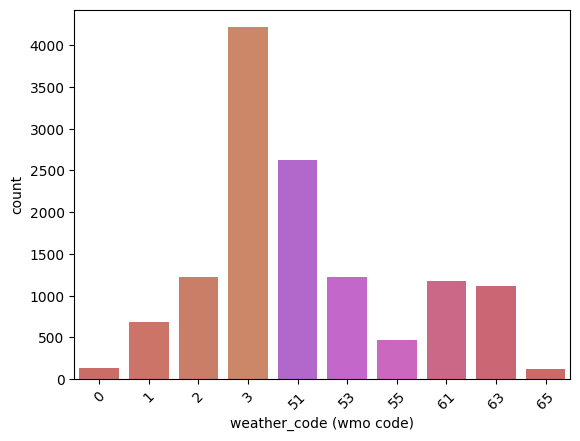

In [5]:

# Countplot directly with your numeric weather codes
ax = sns.countplot(
    x="weather_code (wmo code)", 
    data=weather, 
    hue="weather_code (wmo code)",   # assign hue to suppress warning
    palette="hls", 
    legend=False                     # avoid duplicate legend
)

# Rotate x-axis labels for readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()


In [6]:
weather[["temperature_2m_max (°C)","temperature_2m_min (°C)",'wind_speed_10m_max (km/h)','precipitation_sum (mm)','temperature_2m_mean (°C)',
        'dew_point_2m_mean (°C)','cloud_cover_max (%)','relative_humidity_2m_mean (%)','pressure_msl_mean (hPa)', 'cloud_cover_mean (%)',
        'apparent_temperature_mean (°C)']].describe()

,temperature_2m_max (°C),temperature_2m_min (°C),wind_speed_10m_max (km/h),precipitation_sum (mm),temperature_2m_mean (°C),dew_point_2m_mean (°C),cloud_cover_max (%),relative_humidity_2m_mean (%),pressure_msl_mean (hPa),cloud_cover_mean (%),apparent_temperature_mean (°C)
count,12966.000000,12966.000000,12966.000000,12966.000000,12966.000000,12966.000000,12966.000000,12966.000000,12966.000000,12966.000000,12966.000000
mean,31.828837,24.904527,18.356756,2.867646,27.889758,22.182369,88.493753,73.046738,1008.735524,61.960589,31.332855
std,3.325902,2.650919,4.233653,8.671642,2.592145,2.118883,20.141438,9.165689,3.833016,30.953615,3.303684
min,22.900000,15.200000,6.900000,0.000000,21.100000,14.600000,0.000000,36.000000,995.400000,0.000000,20.800000
25%,28.900000,23.200000,15.500000,0.000000,25.700000,20.800000,86.000000,68.000000,1005.600000,34.000000,28.700000
50%,32.000000,25.200000,18.200000,0.100000,28.100000,22.600000,100.000000,74.000000,1008.500000,66.000000,32.100000
75%,34.300000,26.900000,21.000000,1.900000,29.900000,23.800000,100.000000,79.000000,1011.900000,93.000000,33.875000
max,41.900000,31.600000,65.200000,255.800000,35.600000,27.200000,100.000000,94.000000,1018.400000,100.000000,39.100000


In [7]:
variables = ['temperature_2m_max (°C)',
 'temperature_2m_min (°C)',
 'wind_speed_10m_max (km/h)',
 'cloud_cover_mean (%)',
 'relative_humidity_2m_mean (%)',
 'pressure_msl_mean (hPa)',
 'cloud_cover_max (%)',
 'dew_point_2m_mean (°C)',
 'temperature_2m_mean (°C)',
 'apparent_temperature_mean (°C)',
 'wind_speed_10m_mean (km/h)',
 'precipitation_sum (mm)','weather_code (wmo code)']

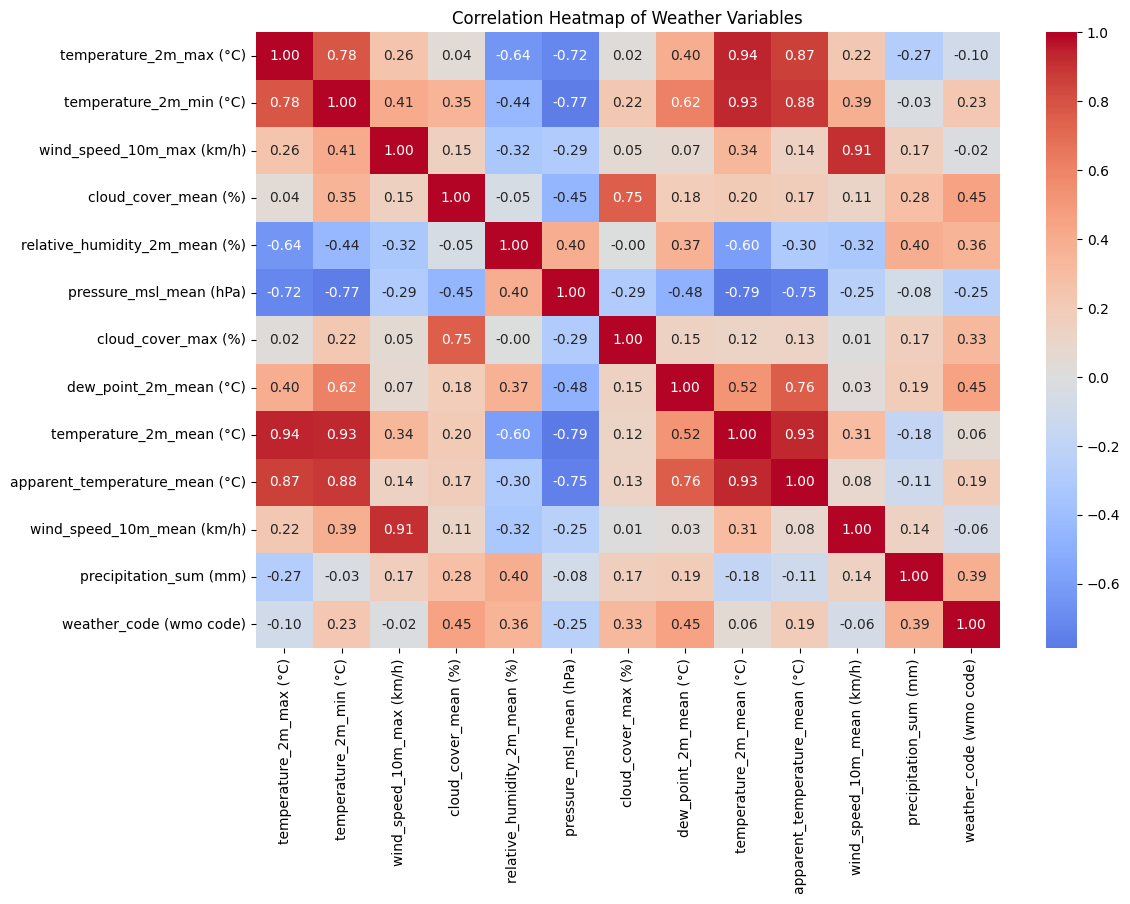

In [8]:
corr = weather[variables].corr()   # Pearson correlation by default
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap of Weather Variables")
plt.show()


In [9]:
weather = weather.drop(columns=[
    'temperature_2m_max (°C)',
    'temperature_2m_min (°C)',
    'apparent_temperature_mean (°C)',
    'wind_speed_10m_max (km/h)',
    'wind_speed_10m_mean (km/h)'
])

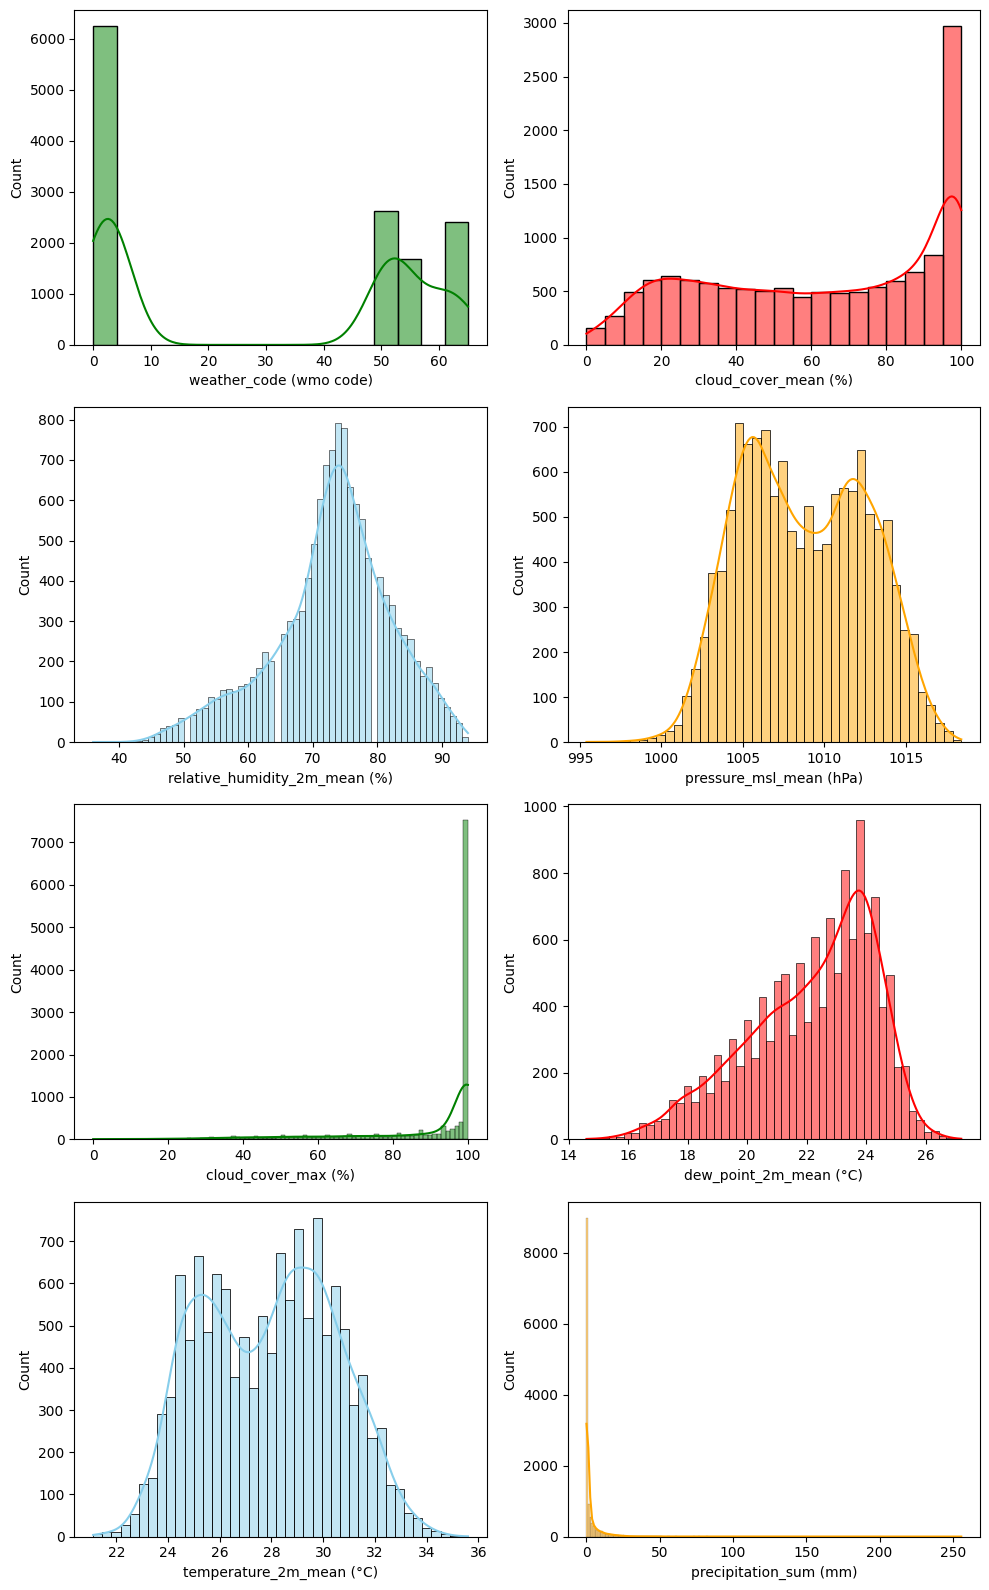

In [10]:
import math

n_cols = 2
n_rows = math.ceil(len(weather.columns) / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, n_rows*4))
axs = axs.flatten()  
colors = ['green', 'red', 'skyblue', 'orange']

for i, column in enumerate(weather.columns):
    sns.histplot(data=weather, x=column, kde=True, 
                 ax=axs[i], color=colors[i % len(colors)])

plt.tight_layout()
plt.show()


In [11]:
Q1 = weather.quantile(0.25)
Q3 = weather.quantile(0.75)
IQR = Q3 - Q1
weather , _ = weather.align((Q1 - 1.5 * IQR) | (weather > (Q3 + 1.5 * IQR)), axis=1, copy=False)

In [12]:
from sklearn.preprocessing import StandardScaler
# log transform skewed column
weather["precipitation_sum (mm)"] = np.log1p(weather["precipitation_sum (mm)"])

# features except target
X = weather.drop("weather_code (wmo code)", axis=1)
y = weather["weather_code (wmo code)"]

# scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled_df.mean().round(2))   # should be ~0
print(X_scaled_df.std().round(2))    # should be ~1

cloud_cover_mean (%)             0.0
relative_humidity_2m_mean (%)    0.0
pressure_msl_mean (hPa)         -0.0
cloud_cover_max (%)              0.0
dew_point_2m_mean (°C)           0.0
temperature_2m_mean (°C)         0.0
precipitation_sum (mm)          -0.0
dtype: float64
cloud_cover_mean (%)             1.0
relative_humidity_2m_mean (%)    1.0
pressure_msl_mean (hPa)          1.0
cloud_cover_max (%)              1.0
dew_point_2m_mean (°C)           1.0
temperature_2m_mean (°C)         1.0
precipitation_sum (mm)           1.0
dtype: float64


In [14]:
# Ensure sorted by date
weather = weather.sort_index()

# Select numeric features to create lags for
lag_features = ["temperature_2m_mean (°C)", "relative_humidity_2m_mean (%)", 
                "pressure_msl_mean (hPa)", "precipitation_sum (mm)", 
                "cloud_cover_mean (%)"]

# Lag features: yesterday & 7 days ago
for col in lag_features:
    weather[f"{col}_lag1"] = weather[col].shift(1)
    weather[f"{col}_lag7"] = weather[col].shift(7)

# Rolling mean (3 days, shifted to avoid leakage)
for col in lag_features:
    weather[f"{col}_rollmean3"] = weather[col].shift(1).rolling(3).mean()

# Drop rows with NaN (from shifts/rolling)
weather = weather.dropna().reset_index(drop=True)

weather.head()


,weather_code (wmo code),cloud_cover_mean (%),relative_humidity_2m_mean (%),pressure_msl_mean (hPa),cloud_cover_max (%),dew_point_2m_mean (°C),temperature_2m_mean (°C),precipitation_sum (mm),temperature_2m_mean (°C)_lag1,temperature_2m_mean (°C)_lag7,...,pressure_msl_mean (hPa)_lag7,precipitation_sum (mm)_lag1,precipitation_sum (mm)_lag7,cloud_cover_mean (%)_lag1,cloud_cover_mean (%)_lag7,temperature_2m_mean (°C)_rollmean3,relative_humidity_2m_mean (%)_rollmean3,pressure_msl_mean (hPa)_rollmean3,precipitation_sum (mm)_rollmean3,cloud_cover_mean (%)_rollmean3
0,3,78,72,1015.7,100,19.4,25.0,0.0,24.4,24.7,...,1012.2,2.104134,0.832909,84.0,65.0,24.466667,75.333333,1015.000000,1.451809,84.000000
1,2,38,72,1015.4,67,18.8,24.3,0.0,25.0,24.5,...,1012.7,0.000000,0.095310,78.0,35.0,24.633333,75.666667,1015.066667,1.451809,86.000000
2,1,18,77,1014.7,48,19.5,23.9,0.0,24.3,24.7,...,1013.9,0.000000,0.095310,38.0,47.0,24.566667,74.666667,1015.266667,0.701378,66.666667
3,2,9,81,1014.6,67,19.3,22.9,0.0,23.9,24.6,...,1015.2,0.000000,0.000000,18.0,63.0,24.400000,73.666667,1015.266667,0.000000,44.666667
4,3,44,77,1014.2,100,17.5,22.3,0.0,22.9,24.5,...,1015.5,0.000000,0.000000,9.0,72.0,23.700000,76.666667,1014.900000,0.000000,21.666667


## Split

In [16]:
train = weather.loc[:'2017-05-31'].copy()
test  = weather.loc['2017-06-01':].copy()

predictors = [col for col in weather.columns if col != 'weather_code (wmo code)']

X_train = train[predictors].copy()
y_train = train['weather_code (wmo code)'].astype(int).copy()

X_test  = test[predictors].copy()
y_test  = test['weather_code (wmo code)'].astype(int).copy()


## Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf = RandomForestClassifier()

In [20]:
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [21]:
rf.score(X_test, y_test)

0.801572068366694

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        89
           1       0.98      0.99      0.99       516
           2       1.00      1.00      1.00      1003
           3       1.00      1.00      1.00      3572
          51       0.76      0.96      0.85      2228
          53       0.44      0.28      0.34      1046
          55       0.15      0.04      0.06       389
          61       0.45      0.54      0.49       999
          63       0.62      0.63      0.62       982
          65       1.00      0.02      0.03       117

    accuracy                           0.80     10941
   macro avg       0.74      0.63      0.63     10941
weighted avg       0.78      0.80      0.78     10941



In [25]:
features = pd.DataFrame(rf.feature_importances_, index = X_train.columns)

In [26]:
features.head(22)

,0
cloud_cover_mean (%),0.080651
relative_humidity_2m_mean (%),0.035084
pressure_msl_mean (hPa),0.023601
cloud_cover_max (%),0.176008
dew_point_2m_mean (°C),0.035751
temperature_2m_mean (°C),0.027568
precipitation_sum (mm),0.261869
temperature_2m_mean (°C)_lag1,0.022077
temperature_2m_mean (°C)_lag7,0.021780
relative_humidity_2m_mean (%)_lag1,0.021282


In [34]:
rf2 = RandomForestClassifier(
    n_estimators=1000,
    criterion='entropy',
    min_samples_split=10,
    max_depth=14,
    random_state=42,
    class_weight="balanced" 
)


In [35]:
rf2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=14, min_samples_split=10, n_estimators=1000,
                       random_state=42)

In [36]:
rf2.score(X_test, y_test)

0.8096152088474545

In [37]:
y_pred2 = rf2.predict(X_test)

In [38]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94        89
           1       0.98      1.00      0.99       516
           2       1.00      1.00      1.00      1003
           3       1.00      1.00      1.00      3572
          51       0.82      0.93      0.87      2228
          53       0.49      0.35      0.41      1046
          55       0.16      0.11      0.13       389
          61       0.48      0.48      0.48       999
          63       0.60      0.74      0.66       982
          65       0.58      0.06      0.11       117

    accuracy                           0.81     10941
   macro avg       0.71      0.66      0.66     10941
weighted avg       0.80      0.81      0.80     10941



## XGBoost